In [1]:
import os, sys
path = os.path.abspath(os.path.join('..'))
os.chdir(path)
if path not in sys.path:
    sys.path.append(path)

In [2]:
import matplotlib.pyplot as plt
import niceplots
plt.style.use(niceplots.get_style())

from optim import TopOpt, Post2D, Post3D

# Test case
- Half MBB 168 mm x 80 mm x 8 mm
- Mesh:
    - **2D**: 42 x 20 elements (4 mm element)
    - **3D**: 42 x 20 x 2 elements (4 mm element)
- 1 kN downward force

- Ti-6Al-4V
- volfrac = 0.3
- r_rho = 8
- 100 iterations

In [3]:
Ex   = 113.8e3 # MPa
Ey   = 113.8e3 # MPa
Gxy  = 44e3 # MPa
nuxy = 0.342
nuyz = 0.342
rho  = 4430e-12 # t/mm^3
CO2mat = 55 # kgCO2/kg

CO2veh = 1030 * 25 * 3.83 # kg_fuel/kg_transported/year * years * kgCO2/kg_fuel = kgCO2/kg

In [4]:
solver1 = TopOpt(inputfile='models/mbb2d.db', res_dir='results/simp/2d/', dim='SIMP2D', jobname='2d')
solver1.set_material(Ex=Ex, Ey=Ey, nuxy=nuxy, nuyz=nuxy, Gxy=Gxy)
solver1.set_volfrac(0.3)
solver1.set_filters(r_rho=8)
solver1.set_optim_options(max_iter=100)

solver1.run()
solver1.save()
solver1.print_timing()

PyMAPDL is taking longer than expected to connect to an MAPDL session.
Checking if there are any available licenses...
Iteration   0...  c =  2136.8798
Iteration   1...  c =  1550.0569
Iteration   2...  c =  1182.3867
Iteration   3...  c =  1008.2243
Iteration   4...  c =   897.1435
Iteration   5...  c =   819.6336
Iteration   6...  c =   756.3160
Iteration   7...  c =   708.0957
Iteration   8...  c =   658.9327
Iteration   9...  c =   604.2539
Iteration  10...  c =   575.8035
Iteration  11...  c =   540.6146
Iteration  12...  c =   514.6476
Iteration  13...  c =   481.3600
Iteration  14...  c =   460.1106
Iteration  15...  c =   437.8453
Iteration  16...  c =   428.5764
Iteration  17...  c =   410.5023
Iteration  18...  c =   412.5377
Iteration  19...  c =   407.9044
Iteration  20...  c =   403.7783
Iteration  21...  c =   392.0712
Iteration  22...  c =   371.2287
Iteration  23...  c =   345.2162
Iteration  24...  c =   338.5885
Iteration  25...  c =   332.4403
Iteration  26...  c =  

Mass = 142.89 g
Footprint = 14100.17 kgCO2


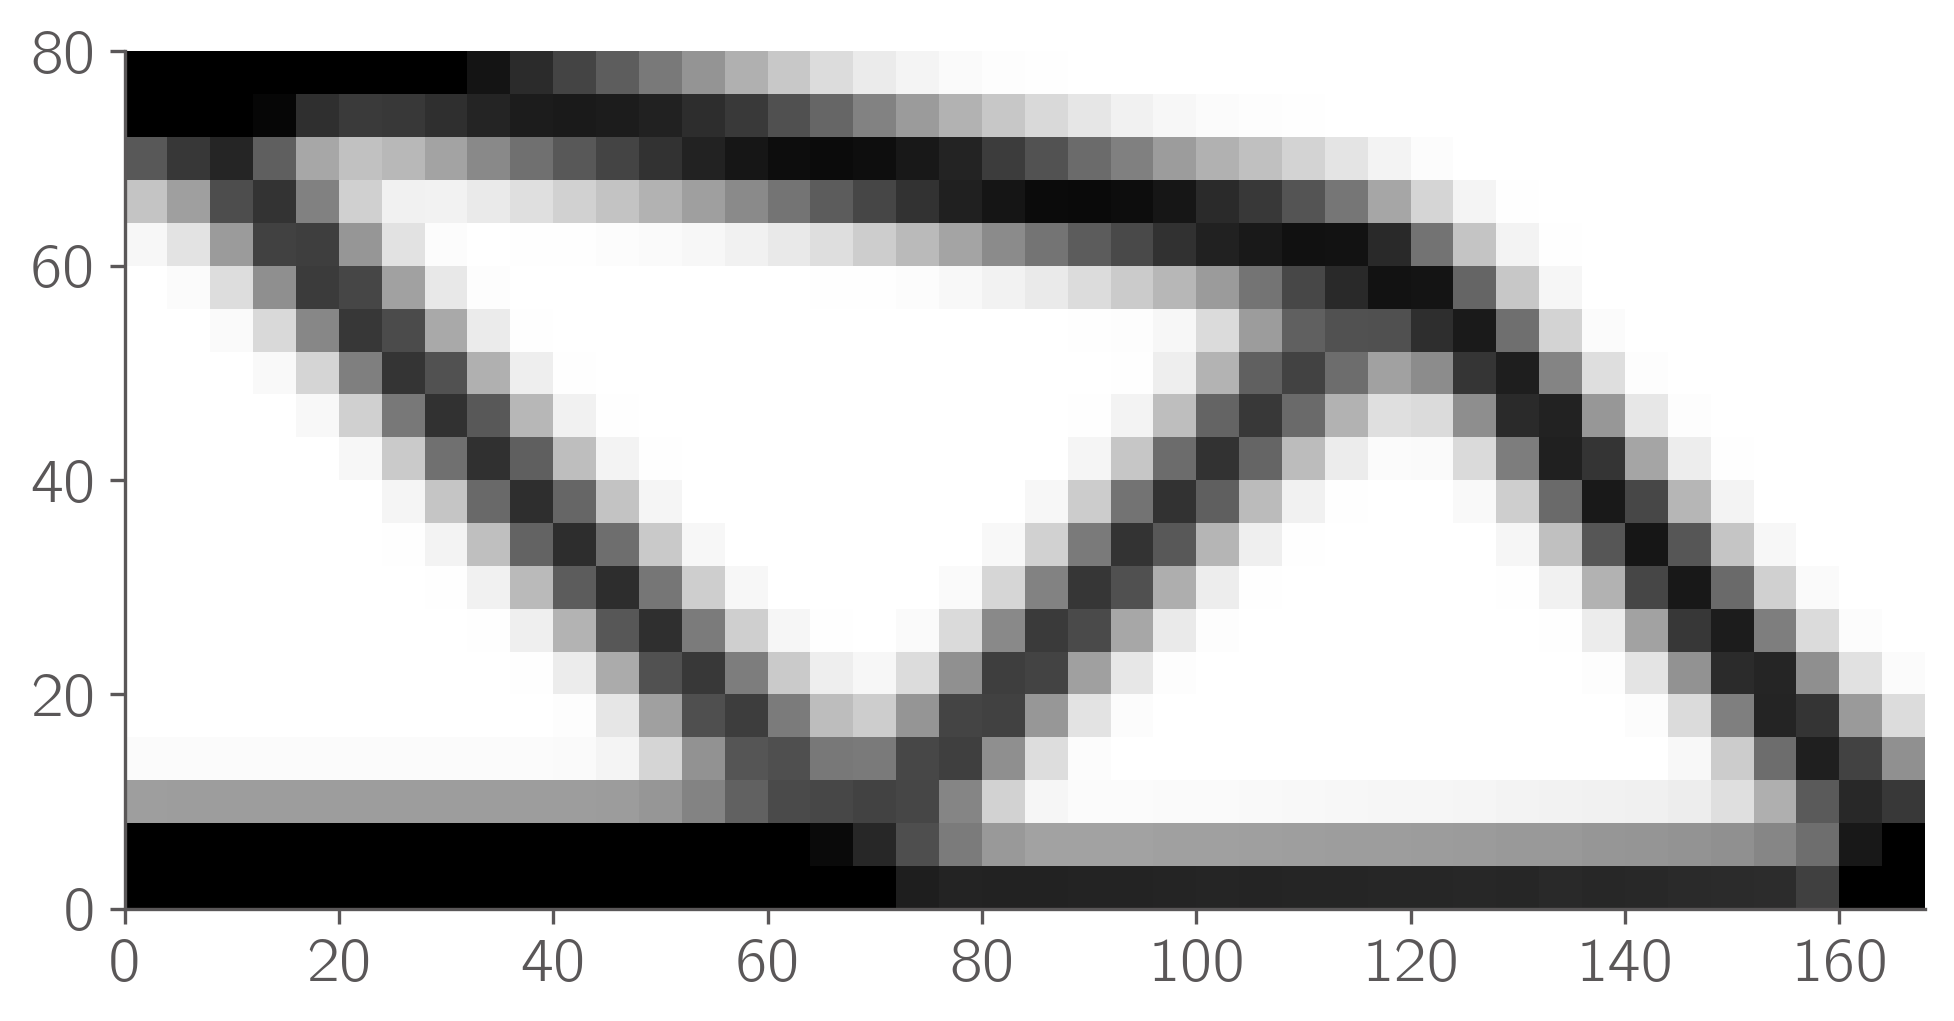

In [10]:
solver1 = TopOpt.load('results/simp/2d/topopt.json')
post1 = Post2D(solver1)
post1.plot_density()
print(f'Mass = {1e6*solver1.get_mass(rho):.2f} g')
print(f'Footprint = {1e3*solver1.get_CO2_footprint(rho,CO2mat,CO2veh):.2f} kgCO2')

In [6]:
solver2 = TopOpt(inputfile='models/mbb3d.db', res_dir='results/simp/3d/', dim='SIMP3D', jobname='3d')
solver2.set_material(Ex=Ex, Ey=Ey, nuxy=nuxy, nuyz=nuxy, Gxy=Gxy)
solver2.set_volfrac(0.3)
solver2.set_filters(r_rho=8)
solver2.set_optim_options(max_iter=100)

solver2.run()
solver2.save()
solver2.print_timing()

Iteration   0...  c =  2187.3431
Iteration   1...  c =  1569.9664
Iteration   2...  c =  1192.4945
Iteration   3...  c =  1014.4769
Iteration   4...  c =   901.5953
Iteration   5...  c =   822.6177
Iteration   6...  c =   758.2882
Iteration   7...  c =   710.3415
Iteration   8...  c =   662.5158
Iteration   9...  c =   608.1088
Iteration  10...  c =   578.0595
Iteration  11...  c =   547.2244
Iteration  12...  c =   524.0564
Iteration  13...  c =   485.7981
Iteration  14...  c =   459.1417
Iteration  15...  c =   437.9117
Iteration  16...  c =   429.0690
Iteration  17...  c =   413.9606
Iteration  18...  c =   412.5016
Iteration  19...  c =   409.6315
Iteration  20...  c =   398.1257
Iteration  21...  c =   382.5517
Iteration  22...  c =   357.0374
Iteration  23...  c =   345.7485
Iteration  24...  c =   321.2571
Iteration  25...  c =   316.9453
Iteration  26...  c =   307.1087
Iteration  27...  c =   290.8907
Iteration  28...  c =   285.8393
Iteration  29...  c =   271.2626
Iteration 

Mass = 142.89 g
Footprint = 14100.13 kgCO2


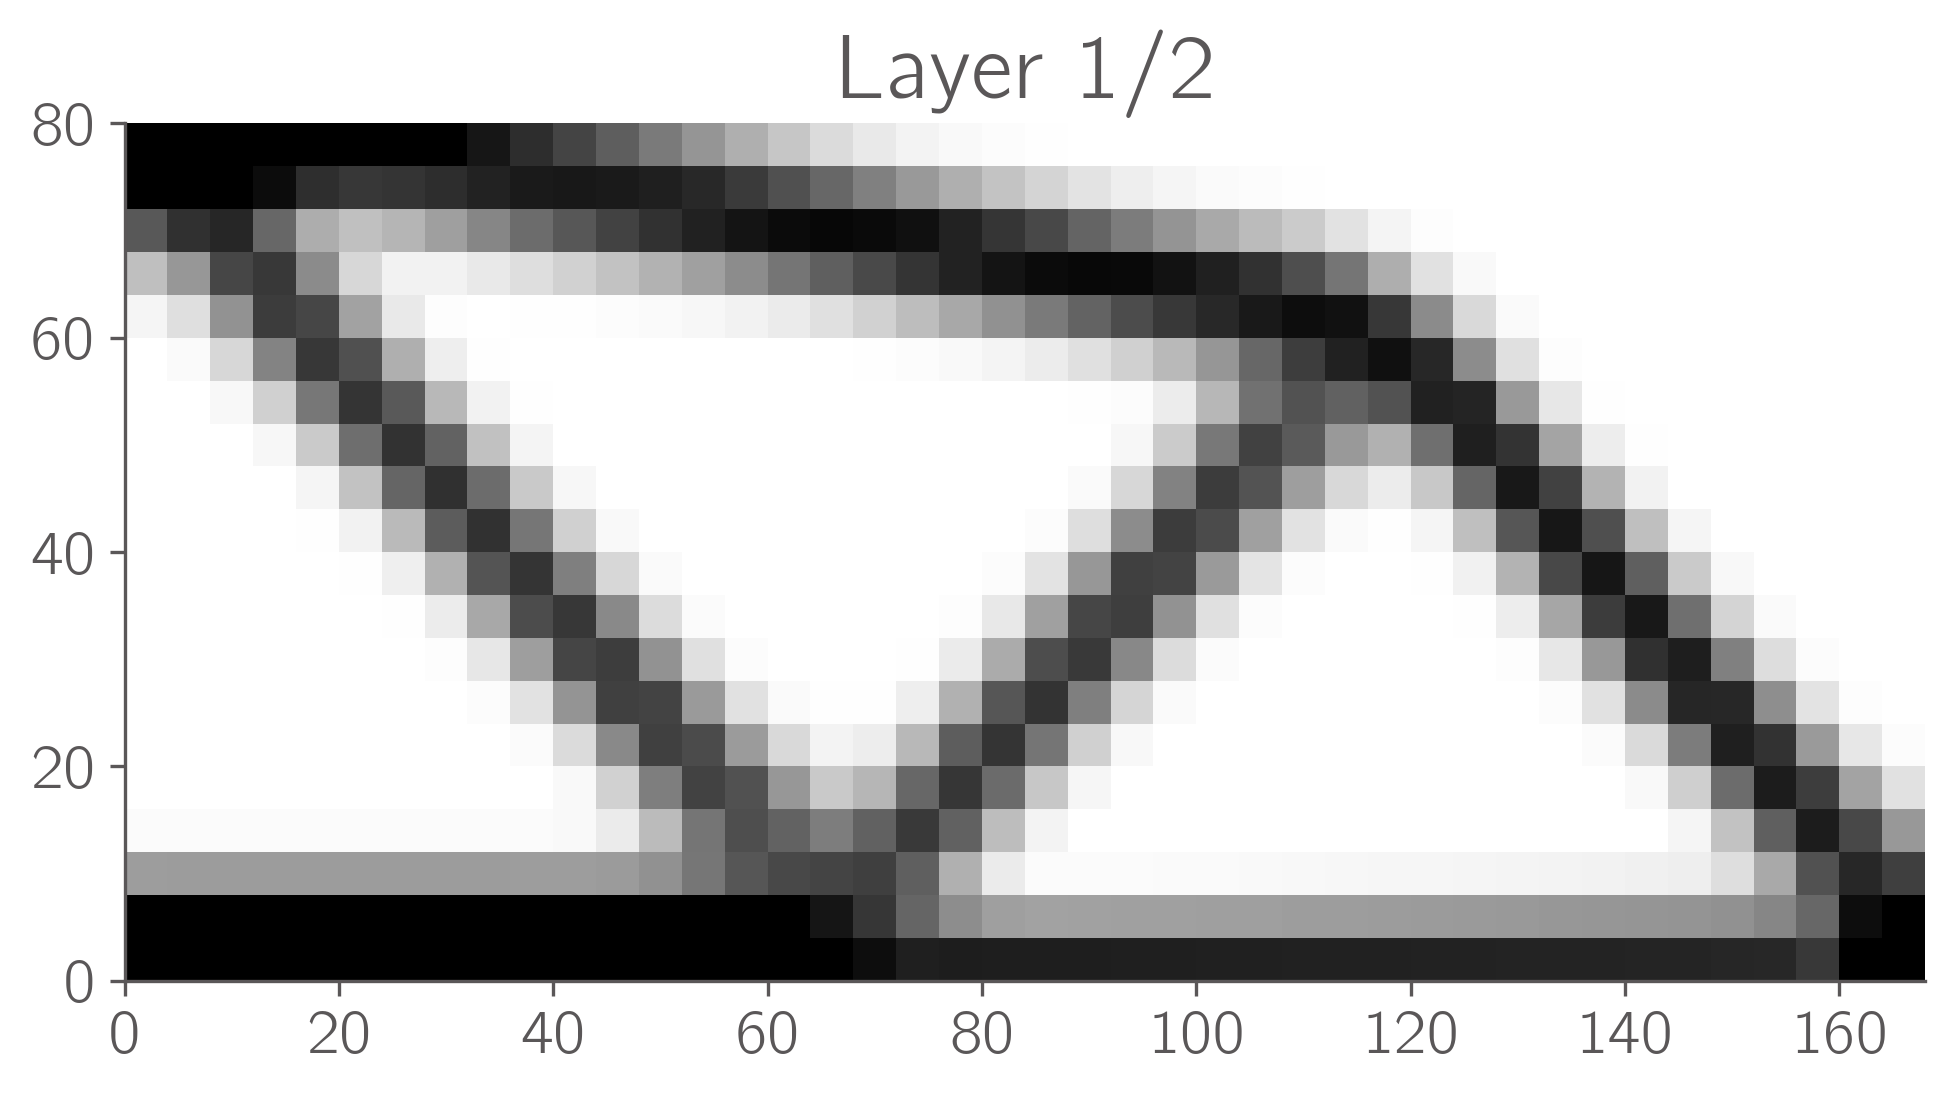

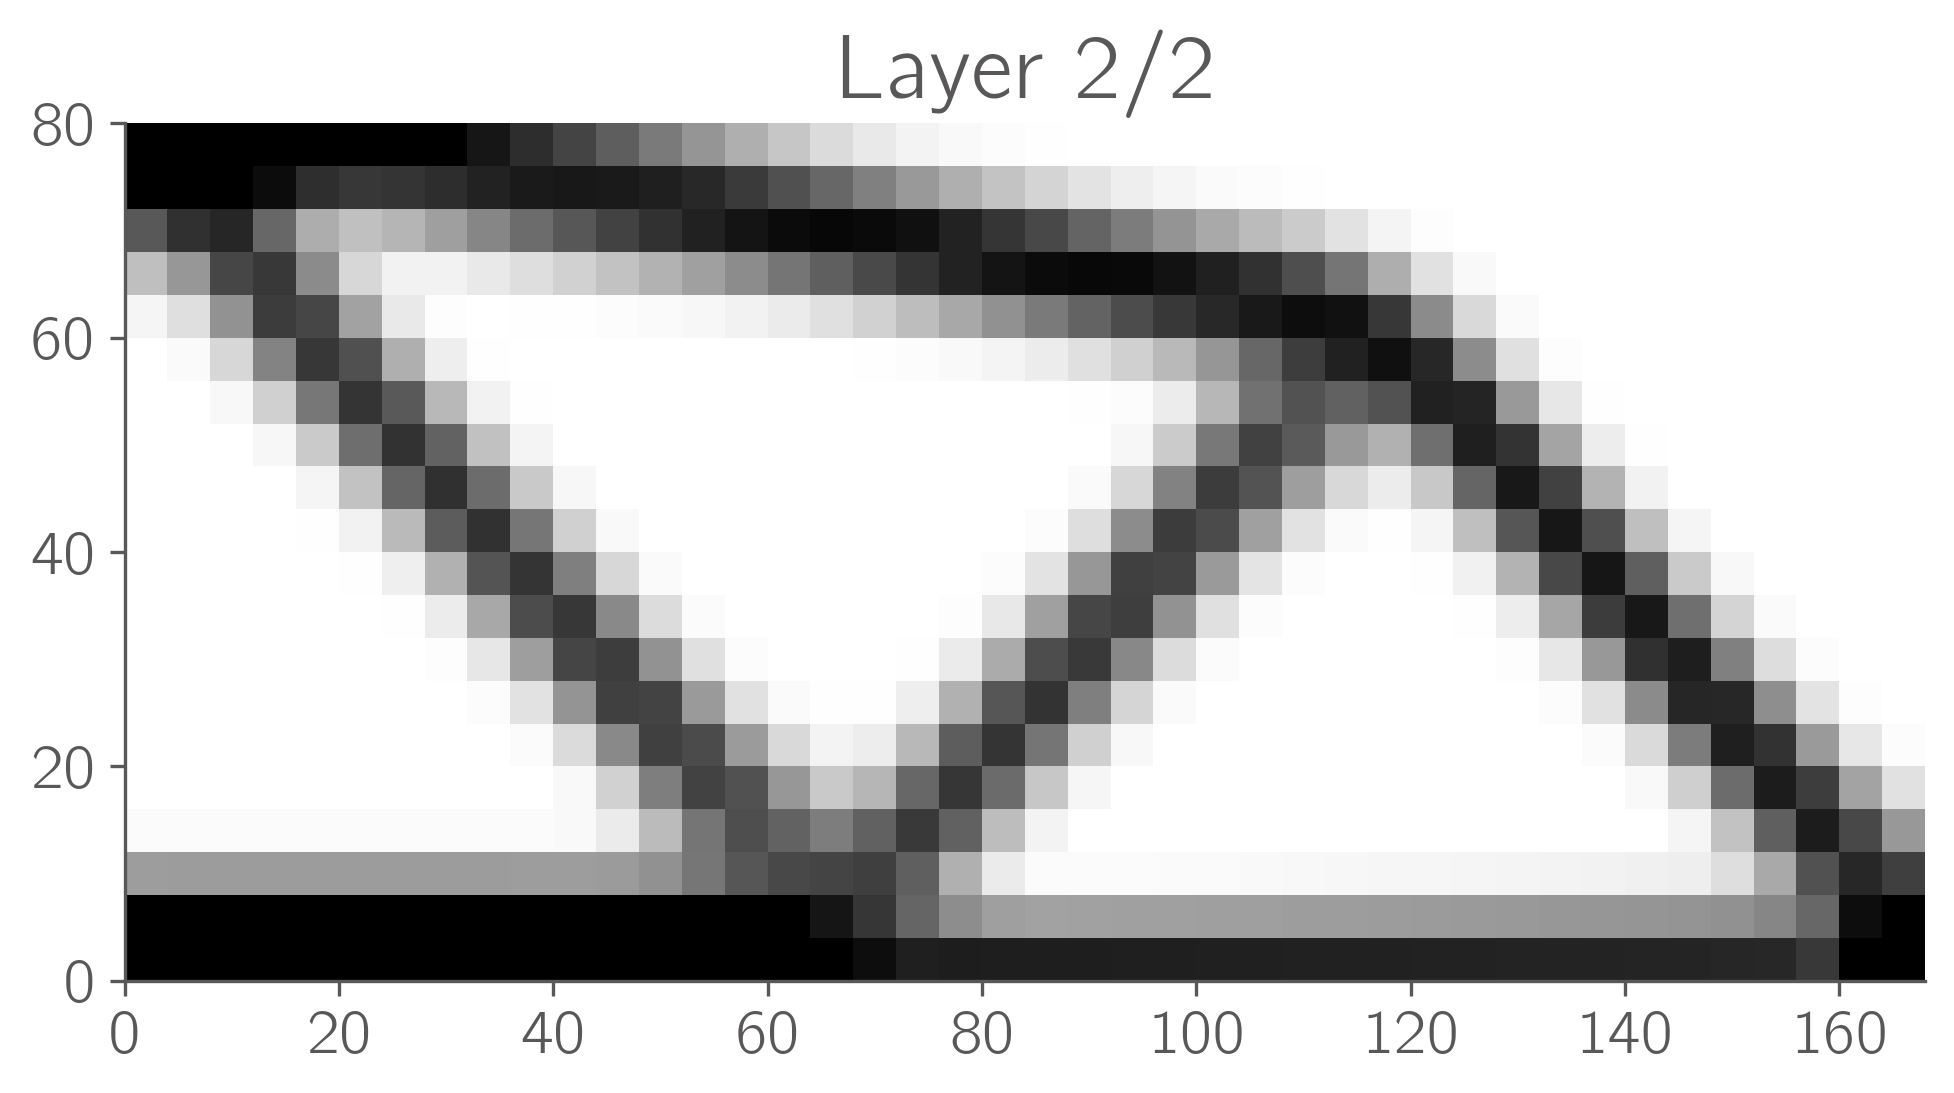

In [5]:
solver2 = TopOpt.load('results/simp/3d/topopt.json')
post2 = Post3D(solver2)
post2.plot_layer_density(layer=0)
post2.plot_layer_density(layer=1)
print(f'Mass = {1e6*solver2.get_mass(rho):.2f} g')
print(f'Footprint = {1e3*solver2.get_CO2_footprint(rho,CO2mat,CO2veh):.2f} kgCO2')

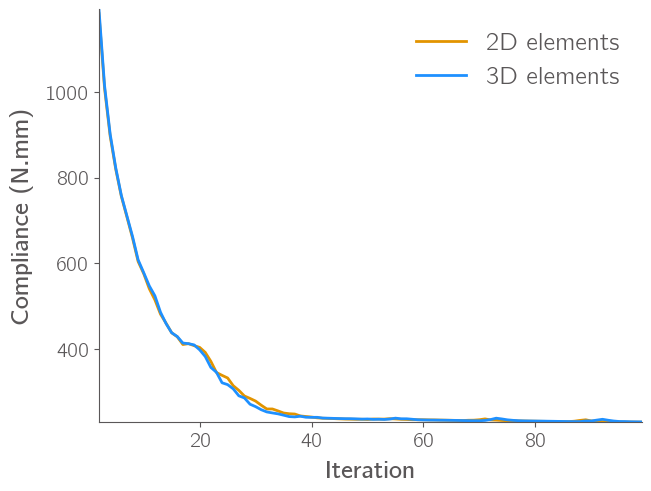

In [9]:
plt.plot(range(2,100), solver1.comp_max_hist[2:100], label='2D elements')
plt.plot(range(2,100), solver2.comp_max_hist[2:100], label='3D elements')
plt.ylabel('Compliance (N.mm)')
plt.xlabel('Iteration')
plt.legend()